In [1]:
import matplotlib.pyplot as plt
import numpy as np
import healpy as hp
import pysm3
import pysm3.units as u
from mapsim.noise_calc import *
import os
from utils import *

### Create a simple single frequency CMB map with pysm3

In [2]:
idir = 'input_maps/'
ddir = f'{idir}data/'

In [3]:
import os
os.environ['PYSM_LOCAL_DATA']=f'/pscratch/sd/s/susannaz/BBFLP/'

In [4]:
# Define params
nside = 64 #512
nu = 90
np.random.seed(1000)

In [5]:
# Get theory CMB C_ells for given input r
cl_cmb_tt, cl_cmb_ee, cl_cmb_bb, cl0 = cmb_cl_theory(nside=nside, input_r=0.01)

In [6]:
# CMB amplitude from theory
IQU_maps = hp.synfast([cl_cmb_tt, cl_cmb_ee, cl_cmb_bb, cl0, cl0, cl0],
                      nside, new=True)

In [7]:
# Write to disk
hp.write_map(f"{idir}CMB_IQUampmaps_ns{nside}.fits", IQU_maps, dtype=['float64','float64','float64'], overwrite=True)

In [9]:
# Generate sky map
sky = pysm3.Sky(nside=nside, component_objects=[pysm3.CMBMap(nside, map_IQU=f"{idir}CMB_IQUampmaps_ns{nside}.fits")])
mapp = sky.get_emission(nu * u.GHz)
#mapp.to(u.uK_CMB, equivalencies=u.cmb_equivalencies(nu*u.GHz))

In [10]:
# Smoothing, Equatorial coordinates, RING format
smooth = 1
if smooth:
    lmax = 3*nside-1
    beams = Simons_Observatory_V3_SA_beam_FWHM()
    ch_name = 'SO_SAT_93'
    nch = 2 #2nd freq channel
    fwhm = beams[nch]/60 #rad
    #map = pysm3.apply_smoothing_and_coord_transform(mapp, fwhm=fwhm, lmax=lmax, rot=hp.Rotator(coord="GC"))
    map = hp.smoothing(mapp, fwhm = np.radians(fwhm/60.))
else:
    map = mapp

In [11]:
# Write to disk 
os.system('mkdir -p input_maps')
hp.write_map(f'input_maps/cmb_SAT_f0{nu}_ns{nside}.fits', map, coord="C", dtype=np.float32, overwrite=True)

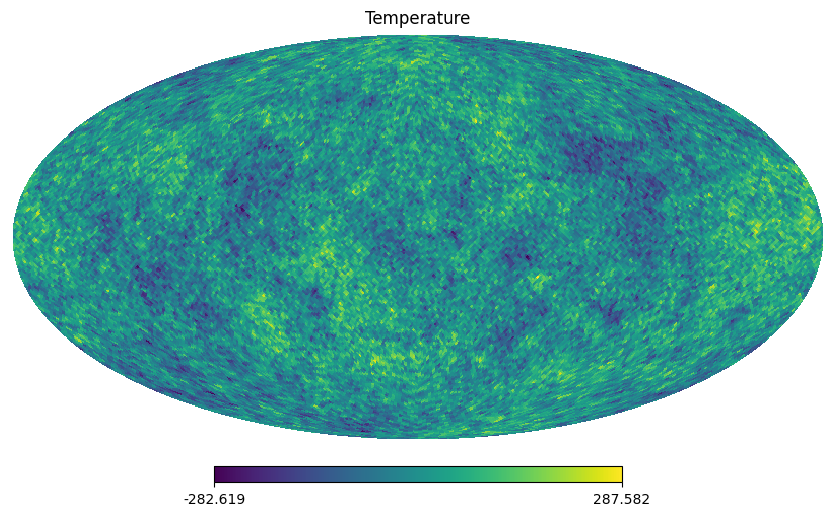

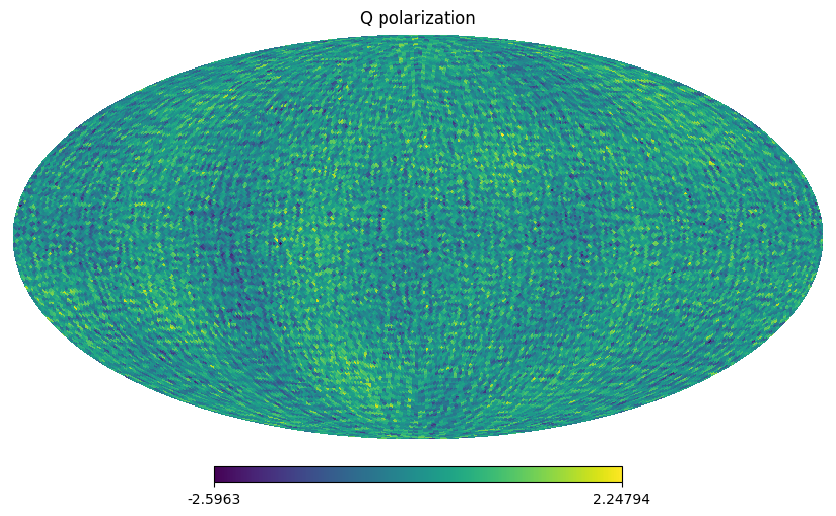

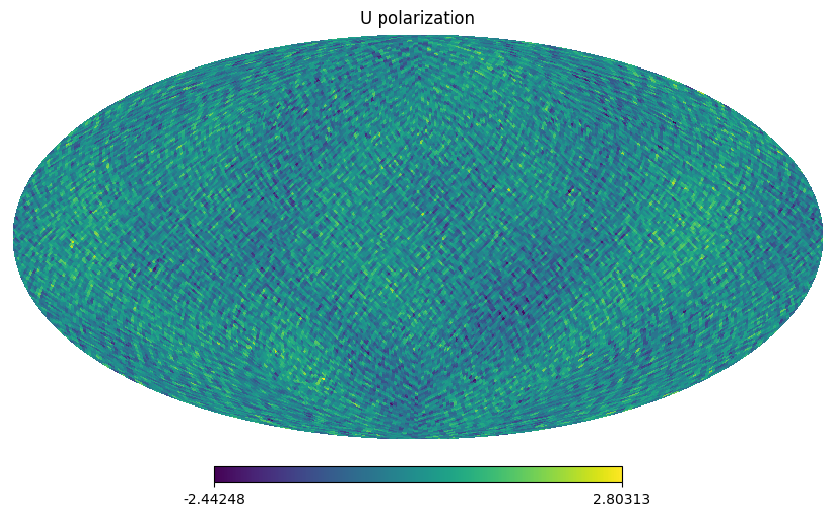

In [12]:
# Plot
npol = 3 
lbl = ['Temperature', 'Q polarization', 'U polarization']
for pol in np.arange(npol):
    hp.mollview(map[pol,:], title=lbl[pol])

In [9]:
#TODO: Integrate with current tools, e.g. BBSims

#### Continue to the next section

Go to [Section 3 - Schedule](Sec3_Make_and_Analyze_schedule.ipynb).